<a href="https://colab.research.google.com/github/ryota1431/google_colab/blob/main/molfile_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving 18cr-B.mol to 18cr-B.mol


In [3]:
def parse_mol_file(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()

    # ヘッダー行：通常は最初の3行
    counts_line = lines[3]  # 4行目に原子数・結合数などがある
    num_atoms = int(counts_line[0:3])
    num_bonds = int(counts_line[3:6])

    # 原子情報（5行目から始まる）
    atom_lines = lines[4:4+num_atoms]
    atoms = []
    for line in atom_lines:
        x = float(line[0:10])
        y = float(line[10:20])
        z = float(line[20:30])
        symbol = line[31:34].strip()
        atoms.append({'x': x, 'y': y, 'z': z, 'symbol': symbol})

    # 結合情報（原子の後に続く）
    bond_lines = lines[4+num_atoms : 4+num_atoms+num_bonds]
    bonds = []
    for line in bond_lines:
        a1 = int(line[0:3]) - 1  # molファイルは1始まり
        a2 = int(line[3:6]) - 1
        bond_type = int(line[6:9])
        bonds.append((a1, a2, bond_type))

    return atoms, bonds


In [4]:
def plot_molecule_2d(atoms, bonds):
    fig, ax = plt.subplots(figsize=(6, 6))

    # 原子の描画
    for atom in atoms:
        ax.plot(atom['x'], atom['y'], 'ko', markersize=6, label=atom['symbol'])
        # ax.text(atom['x'] + 0.05, atom['y'] + 0.05, atom['symbol'], fontsize=12)

    # 結合の描画
    for a1, a2, bond_type in bonds:
        x1, y1 = atoms[a1]['x'], atoms[a1]['y']
        x2, y2 = atoms[a2]['x'], atoms[a2]['y']
        ax.plot([x1, x2], [y1, y2], 'k-', linewidth=bond_type)

    ax.set_aspect('equal')
    # ax.axis('off')
    plt.title("Molecule from mol file")
    plt.show()


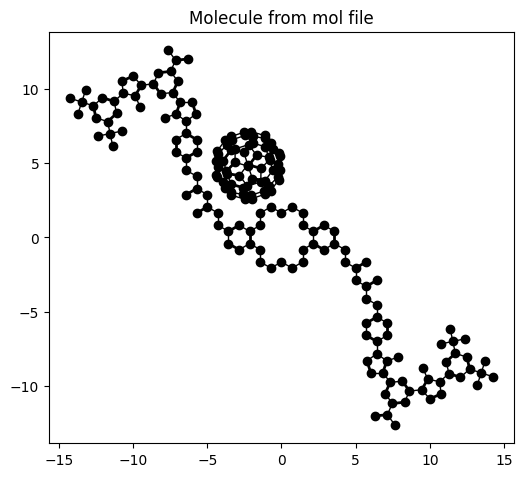

In [11]:
# アップロードファイル名を指定
filename = list(uploaded.keys())[0]

atoms, bonds = parse_mol_file(filename)
plot_molecule_2d(atoms, bonds)


In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [7]:
from google.colab import files
uploaded = files.upload()


Saving fullerenne_crownether.mol to fullerenne_crownether.mol


In [8]:
def parse_mol_file(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()

    # 4行目に原子数・結合数
    counts_line = lines[3]
    num_atoms = int(counts_line[0:3])
    num_bonds = int(counts_line[3:6])

    atom_lines = lines[4:4 + num_atoms]
    bond_lines = lines[4 + num_atoms: 4 + num_atoms + num_bonds]

    atoms = []
    for line in atom_lines:
        x = float(line[0:10])
        y = float(line[10:20])
        z = float(line[20:30])
        symbol = line[31:34].strip()
        atoms.append({'x': x, 'y': y, 'z': z, 'symbol': symbol})

    bonds = []
    for line in bond_lines:
        a1 = int(line[0:3]) - 1  # 1-based index
        a2 = int(line[3:6]) - 1
        bond_type = int(line[6:9])
        bonds.append((a1, a2, bond_type))

    return atoms, bonds


In [9]:
def plot_molecule_3d(atoms, bonds):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    # 原子を描画
    for i, atom in enumerate(atoms):
        ax.scatter(atom['x'], atom['y'], atom['z'], s=10, label=atom['symbol'], c='k')
        # ax.text(atom['x'], atom['y'], atom['z'], f"{atom['symbol']}{i+1}", size=10, zorder=1)

    # 結合を描画
    for a1, a2, bond_type in bonds:
        x_vals = [atoms[a1]['x'], atoms[a2]['x']]
        y_vals = [atoms[a1]['y'], atoms[a2]['y']]
        z_vals = [atoms[a1]['z'], atoms[a2]['z']]
        ax.plot(x_vals, y_vals, z_vals, 'k-', linewidth=bond_type)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('3D Structure from mol file')
    plt.tight_layout()
    plt.show()


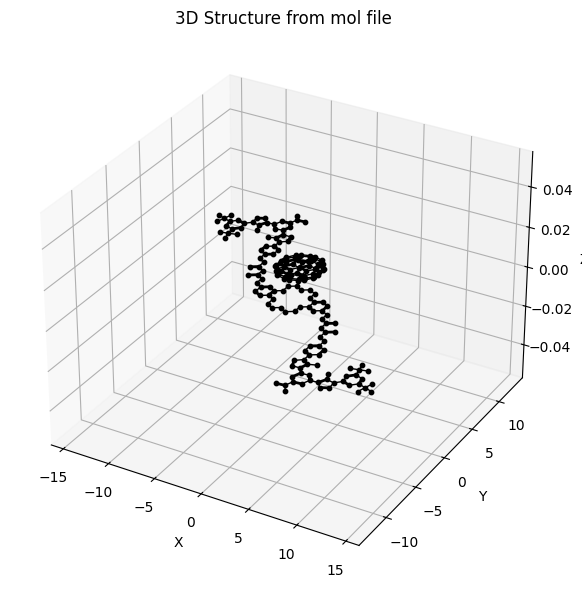

In [10]:

# アップロードされたファイルの名前を取得
filename = list(uploaded.keys())[0]

# molファイルから読み込み
atoms, bonds = parse_mol_file(filename)

# 3Dプロットで可視化
plot_molecule_3d(atoms, bonds)
